In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
#import matplotlib as plt
import matplotlib.pyplot as plt
import sklearn.preprocessing as sp
%matplotlib inline
sns.set_style('whitegrid')
sns.set_context("poster")
sns.set_context("talk", 1.0, {"lines.linewidth": 3})

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

from pylab import rcParams

![ビーコン20個想定](RSSI取得実験図/IMG_0926.jpeg)

In [2]:
#データを取得
df1 = pd.read_csv("./取得データセット/受信機1/beacon_gym1.csv")
df2 = pd.read_csv("./取得データセット/受信機1/beacon_gym2.csv")

#それぞれのカラムを設定
df1.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]
df2.columns = ["UUIDs","Major","Minor","Accuracy","Proximity","TxPower","RSSI","device_name","timestamp","x","y"]

#indexを振り直す
df = [df1[df1.x == i] for i in df1.x.unique()]
for i in range(len(df)):
    df[i] = df[i].reset_index()
df1 = df[0].append(df[1]).append(df[2]).append(df[3])

df = [df2[df2.x == i] for i in df2.x.unique()]
for i in range(len(df)):
    df[i] = df[i].reset_index()
df2 = df[0].append(df[1]).append(df[2]).append(df[3])


#同期ビーコンのid
set_uuid = "1000000007ae1001b000001c4d8dffff"

#送信機のid
id1 = "10000000aaaa41441111110000000000"
id2 = "20000000aaaa41441111110000000000"
id3 = "30000000aaaa41441111110000000000"
id4 = "40000000aaaa41441111110000000000"
id5 = "50000000aaaa41441111110000000000"
id6 = "60000000aaaa41441111110000000000"
id7 = "70000000aaaa41441111110000000000"
id8 = "80000000aaaa41441111110000000000" 
id9 = "90000000aaaa41441111110000000000"
id10 = "a0000000aaaa41441111110000000000"

id_list = [id1,id2,id3,id4,id5,id6,id7,id8]

#locateを作成
df1["locate"] = 0
for i,id0 in enumerate(id_list):
    df1.locate = df1.locate.where(df1.UUIDs != id0,i+1)
    
df2["locate"] = 0
for i,id0 in enumerate(id_list):
    df2.locate = df2.locate.where(df2.UUIDs != id0,i+1)

#deviceを作成
df1["device_area"] = 0
for i in df1.x.unique():
    df1.device_area = df1.device_area.where(df1.x != i,i)

df2["device_area"] = 0
for i in df2.x.unique():
    df2.device_area = df2.device_area.where(df2.x != i,i)

#発信機ごとに分ける
df_list1 = [df1[(df1.UUIDs == i) | (df1.UUIDs == set_uuid)] for i in id_list]

df_list2 = [df2[(df2.UUIDs == i) | (df2.UUIDs == set_uuid)] for i in id_list]

df_list = df_list1

In [31]:
df_list[0]

,index,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device_area
3,3,1000000007ae1001b000001c4d8dffff,8192,3,0.226475,immediate,-128,-77,nkmr-2,2018/02/12 09:32:54,1,100,0,1
4,4,1000000007ae1001b000001c4d8dffff,8192,3,0.219975,immediate,-128,-76,nkmr-2,2018/02/12 09:32:54,1,100,0,1
6,6,10000000aaaa41441111110000000000,2,38,0.859754,near,-74,-71,nkmr-2,2018/02/12 09:32:54,1,100,1,1
8,8,1000000007ae1001b000001c4d8dffff,8192,3,0.130237,immediate,-128,-58,nkmr-2,2018/02/12 09:32:54,1,100,0,1
10,10,10000000aaaa41441111110000000000,2,38,1.496244,near,-74,-82,nkmr-2,2018/02/12 09:32:54,1,100,1,1
15,15,10000000aaaa41441111110000000000,2,38,1.105988,near,-74,-76,nkmr-2,2018/02/12 09:32:54,1,100,1,1
18,18,1000000007ae1001b000001c4d8dffff,8192,3,0.201574,immediate,-128,-73,nkmr-2,2018/02/12 09:32:54,1,100,0,1
19,19,1000000007ae1001b000001c4d8dffff,8192,3,0.201574,immediate,-128,-73,nkmr-2,2018/02/12 09:32:54,1,100,0,1
23,23,10000000aaaa41441111110000000000,2,38,0.739177,near,-74,-68,nkmr-2,2018/02/12 09:32:54,1,100,1,1
26,26,1000000007ae1001b000001c4d8dffff,8192,3,0.179410,immediate,-128,-69,nkmr-2,2018/02/12 09:32:54,1,100,0,1


In [50]:
"""
#それぞれのエリアの上位50%のデータのみを抽出して
ave = []
beta = pd.DataFrame()

for i in df_list[0].x.unique():
    ave.append(df_list[0][df_list[0].x == i].RSSI.mean())

for a,d in zip(ave,df_list[0].x.unique()):
    beta = pd.concat([beta,df_list[0][(df_list[0].x == d) & (df_list[0].RSSI >= round(a,1))]])

df_list[0] = beta
"""

'\n#それぞれのエリアの上位50%のデータのみを抽出して\nave = []\nbeta = pd.DataFrame()\n\nfor i in df_list[0].x.unique():\n    ave.append(df_list[0][df_list[0].x == i].RSSI.mean())\n\nfor a,d in zip(ave,df_list[0].x.unique()):\n    beta = pd.concat([beta,df_list[0][(df_list[0].x == d) & (df_list[0].RSSI >= round(a,1))]])\n\ndf_list[0] = beta\n'

### 前処理用のモジュールの読み込み

In [3]:
import preprocessing2 as pre

### 時刻合わせ

In [4]:
#時刻合わせ
for (i,df) in enumerate(df_list):
    df_list[i] = pre.set_time(df,set_uuid)

In [11]:
df_list[0]

,index,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device_area,time
4,12861,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:05,3,100,1,3,3
6,6,10000000aaaa41441111110000000000,2,38,0.859754,near,-74,-71,nkmr-2,2018/02/12 09:32:54,1,100,1,1,3
10,10,10000000aaaa41441111110000000000,2,38,1.496244,near,-74,-82,nkmr-2,2018/02/12 09:32:54,1,100,1,1,3
14,12871,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:05,3,100,1,3,3
15,15,10000000aaaa41441111110000000000,2,38,1.105988,near,-74,-76,nkmr-2,2018/02/12 09:32:54,1,100,1,1,3
23,23,10000000aaaa41441111110000000000,2,38,0.739177,near,-74,-68,nkmr-2,2018/02/12 09:32:54,1,100,1,1,3
28,6583,10000000aaaa41441111110000000000,2,38,1.496244,near,-74,-82,nkmr-2,2018/02/12 09:36:20,2,100,1,2,3
30,30,10000000aaaa41441111110000000000,2,38,1.105988,near,-74,-76,nkmr-2,2018/02/12 09:32:54,1,100,1,1,3
33,6588,10000000aaaa41441111110000000000,2,38,2.238746,near,-74,-90,nkmr-2,2018/02/12 09:36:20,2,100,1,2,3
38,38,10000000aaaa41441111110000000000,2,38,1.496244,near,-74,-82,nkmr-2,2018/02/12 09:32:54,1,100,1,1,3


### 直接波と反射波の識別

In [5]:
#直接波と反射波の識別
df_list = pre.make_cluster(df_list,["RSSI","locate"])

In [6]:
df_list[0]

,index,UUIDs,Major,Minor,Accuracy,Proximity,TxPower,RSSI,device_name,timestamp,x,y,locate,device_area,time,cluster
0,12861,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:05,3,100,1,3,3,0
1,12871,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:05,3,100,1,3,3,0
2,12898,10000000aaaa41441111110000000000,2,38,1.422745,near,-74,-81,nkmr-2,2018/02/12 09:40:06,3,100,1,3,3,0
3,12903,10000000aaaa41441111110000000000,2,38,3.185164,near,-74,-97,nkmr-2,2018/02/12 09:40:06,3,100,1,3,3,1
4,12908,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:06,3,100,1,3,3,0
5,12919,10000000aaaa41441111110000000000,2,38,1.496244,near,-74,-82,nkmr-2,2018/02/12 09:40:06,3,100,1,3,4,0
6,12923,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:06,3,100,1,3,4,0
7,12928,10000000aaaa41441111110000000000,2,38,3.028702,near,-74,-96,nkmr-2,2018/02/12 09:40:06,3,100,1,3,4,1
8,12934,10000000aaaa41441111110000000000,2,38,1.352857,near,-74,-80,nkmr-2,2018/02/12 09:40:07,3,100,1,3,4,0
9,12942,10000000aaaa41441111110000000000,2,38,1.286401,near,-74,-79,nkmr-2,2018/02/12 09:40:07,3,100,1,3,4,0


### 1秒ごとにRSSIの平均値をとる(0)

In [14]:
#train = pd.DataFrame(index = [],columns=[])
#train = []
sample = []

#ビーコンごとに
for i in range(len(df_list)):
    train_m = pd.DataFrame()
    #受信機のエリアごとに
    for a in df_list[i][df_list[i].cluster == 0].device_area.unique():
        area = []
        index = []
        #時間ごとに
        for t in df_list[i][df_list[i].cluster == 0].time.unique():
            #平均値をリストに追加
            area.append(df_list[i][(df_list[i].time == t) & (df_list[i].cluster == 0) & (df_list[i].device_area == a)].RSSI.mean())
            #インデックスをリストに追加
            index.append(t)
        #ビーコンごとの平均値をdataframeに格納
        train_s = pd.DataFrame({"ビーコン{}".format(i+1) : area},
                               index = index)
        train_s["エリア"] = a
        train_m = pd.concat([train_m,train_s],axis = 0)
        train_m = train_m.sort_index()
        train_m = train_m.reset_index(drop = True)
    #print(train_m.reset_index())
    #全てのビーコンの平均値を格納
    #train = pd.concat([train,train_m],axis = 1)
    sample.append(train_m)

for i in range(len(sample)):
    sample[i] = sample[i].sort_values("エリア",kind = "mergesort")

train0 = pd.DataFrame()
#train1 = sample[0]
for i in sample[0]["エリア"].unique():
    train1 = pd.DataFrame()
    for m in range(len(sample)):
        if m != 7:
            train1 = pd.concat([train1,sample[m][sample[m]["エリア"] == i].reset_index()],axis = 1)
        else:
            sample[m] = sample[m].rename(columns = {"エリア" : "area"})
            train1 = pd.concat([train1,sample[m][sample[m]["area"] == i].reset_index()],axis = 1)
    train0 = pd.concat([train0,train1],axis = 0)

train0 = pd.DataFrame()
#train1 = sample[0]
for i in sample[0]["エリア"].unique():
    train1 = pd.DataFrame()
    for m in range(len(sample)):
        if m != 7:
            train1 = pd.concat([train1,sample[m][sample[m]["エリア"] == i].reset_index()],axis = 1)
        else:
            sample[m] = sample[m].rename(columns = {"エリア" : "area"})
            train1 = pd.concat([train1,sample[m][sample[m]["area"] == i].reset_index()],axis = 1)
    train0 = pd.concat([train0,train1],axis = 0)
    
train0["cluster"] = 0

### 1秒ごとにRSSIの平均値をとる(1)

In [85]:
#train = pd.DataFrame(index = [],columns=[])
#train = []
sample = []

#ビーコンごとに
for i in range(len(df_list)):
    train_m = pd.DataFrame()
    #受信機のエリアごとに
    for a in df_list[i][df_list[i].cluster == 1].device_area.unique():
        area = []
        index = []
        #時間ごとに
        for t in df_list[i][df_list[i].cluster == 1].time.unique():
            #平均値をリストに追加
            area.append(df_list[i][(df_list[i].time == t) & (df_list[i].cluster == 1) & (df_list[i].device_area == a)].RSSI.mean())
            #インデックスをリストに追加
            index.append(t)
        #ビーコンごとの平均値をdataframeに格納
        train_s = pd.DataFrame({"ビーコン{}".format(i+1) : area},
                               index = index)
        train_s["エリア"] = a
        train_m = pd.concat([train_m,train_s],axis = 0)
        train_m = train_m.sort_index()
        train_m = train_m.reset_index(drop = True)
    #print(train_m.reset_index())
    #全てのビーコンの平均値を格納
    #train = pd.concat([train,train_m],axis = 1)
    sample.append(train_m)

for i in range(len(sample)):
    sample[i] = sample[i].sort_values("エリア",kind = "mergesort")

train_1 = pd.DataFrame()
#train1 = sample[0]
for i in sample[0]["エリア"].unique():
    train1 = pd.DataFrame()
    for m in range(len(sample)):
        if m != 7:
            train1 = pd.concat([train1,sample[m][sample[m]["エリア"] == i].reset_index()],axis = 1)
        else:
            sample[m] = sample[m].rename(columns = {"エリア" : "area"})
            train1 = pd.concat([train1,sample[m][sample[m]["area"] == i].reset_index()],axis = 1)
    train_1 = pd.concat([train_1,train1],axis = 0)

train_1["cluster"] = 1

In [15]:
train = train0
#train = pd.concat([train0,train_1])
train = train.fillna(method="ffill").drop("aaaa",axis=1)
train = train.dropna(how = "any")
train= train.drop("index",axis=1)
train = train.drop("エリア",axis=1)
train["area"] = train.area.astype(int)

### 固定時のデータも使用する場合は、以下の処理を行う

In [90]:
df_list = df_list2

In [91]:
#時刻合わせ
for (i,df) in enumerate(df_list):
    df_list[i] = pre.set_time(df,set_uuid)

#直接波と反射波の識別
df_list = pre.make_cluster(df_list,["RSSI","locate"])

### 1秒ごとにRSSIの平均値をとる(0)(固定バージョン)

In [92]:
sample = []

#ビーコンごとに
for i in range(len(df_list)):
    train_m = pd.DataFrame()
    #受信機のエリアごとに
    for a in df_list[i][df_list[i].cluster == 0].device_area.unique():
        area = []
        index = []
        #時間ごとに
        for t in df_list[i][df_list[i].cluster == 0].time.unique():
            #平均値をリストに追加
            area.append(df_list[i][(df_list[i].time == t) & (df_list[i].cluster == 0) & (df_list[i].device_area == a)].RSSI.mean())
            #インデックスをリストに追加
            index.append(t)
        #ビーコンごとの平均値をdataframeに格納
        train_s = pd.DataFrame({"ビーコン{}".format(i+1) : area},
                               index = index)
        train_s["エリア"] = a
        train_m = pd.concat([train_m,train_s],axis = 0)
        train_m = train_m.sort_index()
        train_m = train_m.reset_index(drop = True)
    #全てのビーコンの平均値を格納
    sample.append(train_m)

for i in range(len(sample)):
    sample[i] = sample[i].sort_values("エリア",kind = "mergesort")

train0 = pd.DataFrame()
#train1 = sample[0]
for i in sample[0]["エリア"].unique():
    train1 = pd.DataFrame()
    for m in range(len(sample)):
        if m != 7:
            train1 = pd.concat([train1,sample[m][sample[m]["エリア"] == i].reset_index()],axis = 1)
        else:
            sample[m] = sample[m].rename(columns = {"エリア" : "area"})
            train1 = pd.concat([train1,sample[m][sample[m]["area"] == i].reset_index()],axis = 1)
    train0 = pd.concat([train0,train1],axis = 0)

train0 = pd.DataFrame()
#train1 = sample[0]
for i in sample[0]["エリア"].unique():
    train1 = pd.DataFrame()
    for m in range(len(sample)):
        if m != 7:
            train1 = pd.concat([train1,sample[m][sample[m]["エリア"] == i].reset_index()],axis = 1)
        else:
            sample[m] = sample[m].rename(columns = {"エリア" : "area"})
            train1 = pd.concat([train1,sample[m][sample[m]["area"] == i].reset_index()],axis = 1)
    train0 = pd.concat([train0,train1],axis = 0)
    
train0["cluster"] = 0

### 1秒ごとにRSSIの平均値をとる(1)(固定バージョン)

In [93]:
sample = []

#ビーコンごとに
for i in range(len(df_list)):
    train_m = pd.DataFrame()
    #受信機のエリアごとに
    for a in df_list[i][df_list[i].cluster == 1].device_area.unique():
        area = []
        index = []
        #時間ごとに
        for t in df_list[i][df_list[i].cluster == 1].time.unique():
            #平均値をリストに追加
            area.append(df_list[i][(df_list[i].time == t) & (df_list[i].cluster == 1) & (df_list[i].device_area == a)].RSSI.mean())
            #インデックスをリストに追加
            index.append(t)
        #ビーコンごとの平均値をdataframeに格納
        train_s = pd.DataFrame({"ビーコン{}".format(i+1) : area},
                               index = index)
        train_s["エリア"] = a
        train_m = pd.concat([train_m,train_s],axis = 0)
        train_m = train_m.sort_index()
        train_m = train_m.reset_index(drop = True)
    #print(train_m.reset_index())
    #全てのビーコンの平均値を格納
    #train = pd.concat([train,train_m],axis = 1)
    sample.append(train_m)

for i in range(len(sample)):
    sample[i] = sample[i].sort_values("エリア",kind = "mergesort")

train_1 = pd.DataFrame()
#train1 = sample[0]
for i in sample[0]["エリア"].unique():
    train1 = pd.DataFrame()
    for m in range(len(sample)):
        if m != 7:
            train1 = pd.concat([train1,sample[m][sample[m]["エリア"] == i].reset_index()],axis = 1)
        else:
            sample[m] = sample[m].rename(columns = {"エリア" : "area"})
            train1 = pd.concat([train1,sample[m][sample[m]["area"] == i].reset_index()],axis = 1)
    train_1 = pd.concat([train_1,train1],axis = 0)

train_1["cluster"] = 1

In [94]:
train2 = pd.concat([train0,train_1])
train2 = train2.fillna(method="ffill").drop("aaaa",axis=1)
train2 = train2.dropna(how = "any")
train2 = train2.drop("index",axis=1)
train2 = train2.drop("エリア",axis=1)
train2["area"] = train2.area.astype(int)

### 学習用データの作成

In [16]:
train_s = test_s = train.sample(frac=1).dropna(how="any")
train_s = train_s.iloc[0:len(train)*3//4]
test_s =  test_s.iloc[len(train)*3//4:len(train)]

In [28]:
train_s

,ビーコン1,ビーコン2,ビーコン3,ビーコン4,ビーコン5,ビーコン6,ビーコン7,ビーコン8,area,cluster
139,-85.000000,-79.000000,-100.000000,-87.000000,-85.000000,-80.000000,-84.000000,-91.000000,1,0
50,-81.500000,-85.000000,-81.500000,-74.000000,-74.666667,-75.500000,-80.500000,-83.000000,3,0
104,-77.000000,-77.000000,-86.000000,-79.333333,-80.500000,-81.000000,-83.000000,-81.000000,2,0
66,-75.750000,-72.800000,-79.000000,-79.000000,-88.000000,-83.000000,-82.500000,-76.000000,1,0
6,-83.000000,-79.333333,-76.333333,-74.428571,-76.000000,-80.000000,-89.000000,-73.750000,1,0
67,-85.000000,-80.333333,-84.000000,-86.000000,-87.000000,-75.888889,-72.285714,-74.500000,4,0
13,-68.000000,-72.000000,-82.750000,-77.000000,-84.200000,-82.000000,-91.000000,-69.000000,1,0
52,-86.750000,-95.000000,-88.000000,-85.000000,-82.000000,-75.857143,-65.200000,-78.666667,4,0
112,-85.000000,-86.500000,-79.750000,-80.000000,-75.000000,-69.000000,-78.750000,-87.500000,3,0
134,-77.000000,-76.000000,-89.000000,-78.000000,-78.000000,-95.000000,-90.000000,-86.000000,2,0


### 学習用データの作成(パターン2)

In [105]:
train_s = train2.sample(frac=1).dropna(how="any")
test_s = train.sample(frac=1).dropna(how="any")

### それぞれのエリアの電波強度が上位50%のものを抽出する

In [112]:
#それぞれのエリアの上位50%のデータのみを抽出して
ave = []
beta = pd.DataFrame()

for i in train_s.area.unique():
    ave.append(train_s[train_s.area == i]["ビーコン1"].median())

for a,d in zip(ave,train_s.area.unique()):
    beta = pd.concat([beta,train_s[(train_s.area == d) & (train_s["ビーコン1"] >= round(a,1))]])

train_s = beta

In [17]:
from sklearn.utils import shuffle

# 学習用データセットを用意
train_x = np.array(train_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","ビーコン7","ビーコン8","cluster"]])
#train_x = np.array(train_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","ビーコン7","cluster"]])
#train_x = np.array(train_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","cluster"]])
#train_x = np.array(train_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","cluster"]])
#train_x = np.array(train_s[["ビーコン1","ビーコン3","ビーコン5","ビーコン7","cluster"]])

train_y = np.array(train_s[["area"]])
train_x,train_y = shuffle(train_x,train_y)

test_x = np.array(test_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","ビーコン7","ビーコン8","cluster"]])
#test_x = np.array(test_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","ビーコン7","cluster"]])
#test_x = np.array(test_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","cluster"]])
#test_x = np.array(test_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","cluster"]])
#test_x = np.array(test_s[["ビーコン1","ビーコン3","ビーコン5","ビーコン7","cluster"]])

test_y = np.array(test_s[["area"]])
test_x,test_y = shuffle(test_x,test_y)

### xgboost(主成分分析なし)

In [18]:
import xgboost as xgb

model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(train_x,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer"]

score = (len(hoge_c[hoge_c.pred == hoge_c.answer]))/len(hoge_c)
print("精度:%s" % score)
hoge_c

精度:0.7928571428571428


,pred,answer
0,3,3
1,4,4
2,2,2
3,3,3
4,3,3
5,3,3
6,1,1
7,2,2
8,1,3
9,3,3


### 主成分分析

In [19]:
from sklearn.decomposition import PCA

train_x = np.array(train_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","ビーコン7","ビーコン8"]])
train_x_2 = np.array(train_s[["cluster"]])
train_y = np.array(train_s[["area"]])
train_x,train_x_2,train_y = shuffle(train_x,train_x_2,train_y)

test_x = np.array(test_s[["ビーコン1","ビーコン2","ビーコン3","ビーコン4","ビーコン5","ビーコン6","ビーコン7","ビーコン8"]])
test_x_2 = np.array(test_s[["cluster"]])
test_y = np.array(test_s[["area"]])
test_x,test_x_2,test_y = shuffle(test_x,test_x_2,test_y)

#トレーニングデータの主成分分析
pca = PCA(n_components=5)
#pca.fit(train_x)

transformed = pca.fit_transform(train_x)
transformed = np.concatenate((transformed,train_x_2), axis = 1) 

#テストデータの主成分分析
pca = PCA(n_components=5)
#pca.fit(test_x)

test_x = pca.fit_transform(test_x)
test_x = np.concatenate((test_x,test_x_2), axis = 1) 

### xgboost(主成分分析あり)

In [20]:
model = xgb.XGBClassifier(max_depth=4,n_estimators=500)
clf = model.fit(transformed,train_y)
#clf = model.fit(train_x,train_y)
pred = clf.predict(test_x)


hoge_c = pd.concat([pd.DataFrame(pred),pd.DataFrame(test_y)],axis=1)
#hoge_c.columns = ["pred_x","pred_y","answer_x","answer_y"]
hoge_c.columns = ["pred","answer"]

score = (len(hoge_c[hoge_c.pred == hoge_c.answer]))/len(hoge_c)
print("精度:%s" % score)
hoge_c

精度:0.02857142857142857


,pred,answer
0,2,3
1,4,2
2,1,2
3,3,1
4,1,4
5,2,1
6,1,3
7,1,3
8,4,2
9,1,3


(0, 80)

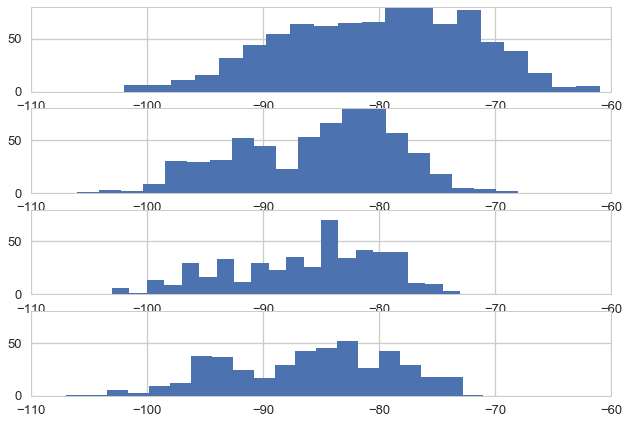

In [316]:
sns.boxplot(y="RSSI",x="x",data=df_list[0])

plt.subplot(4,1,1)
plt.hist(df_list[0][df_list[0].x == 1].RSSI,bins = 20)
plt.xlim(-110,-60)
plt.ylim(0,80)

plt.subplot(4,1,2)
plt.hist(df_list[0][df_list[0].x == 2].RSSI,bins = 20)
plt.xlim(-110,-60)
plt.ylim(0,80)

plt.subplot(4,1,3)
plt.hist(df_list[0][df_list[0].x == 3].RSSI,bins = 20)
plt.xlim(-110,-60)
plt.ylim(0,80)

plt.subplot(4,1,4)
plt.hist(df_list[0][df_list[0].x == 4].RSSI,bins = 20)
plt.xlim(-110,-60)
plt.ylim(0,80)

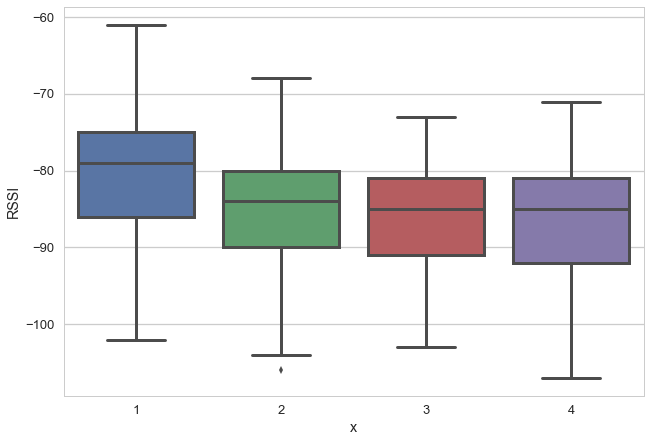

In [33]:
#sns.boxplot(y="RSSI",x="x",data=df_list[0])
sns.boxplot(y="RSSI", x="x", data=df_list[0])

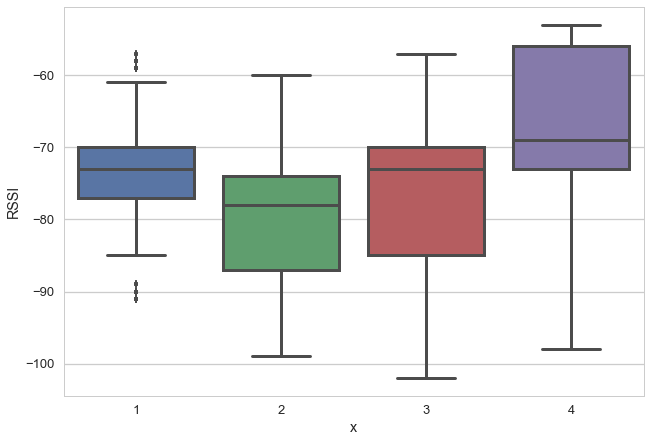

In [35]:
sns.boxplot(y="RSSI", x="x", data=df_list[0])

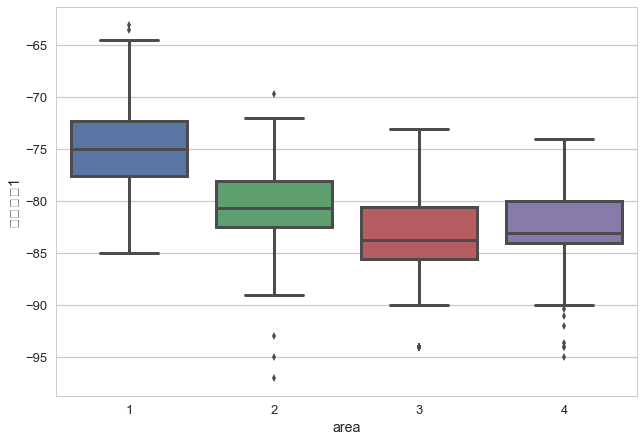

In [27]:
#sns.boxplot(y="RSSI",x="x",data=df_list[0])
sns.boxplot(y="ビーコン1", x="area", data=train_s)

(-105, -40)

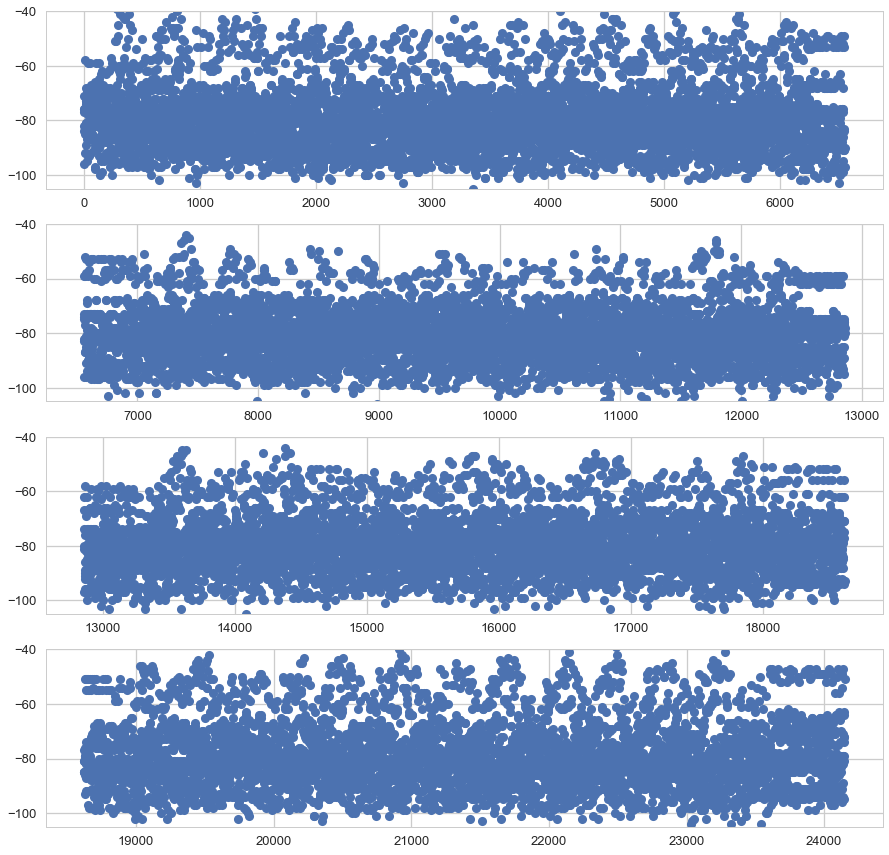

In [24]:
#rcParams['figure.figsize'] = 15,15

plt.subplot(4,1,1)
plt.plot(df1.RSSI[df1.x == 1],"o")
plt.ylim(-105,-40)

plt.subplot(4,1,2)
plt.plot(df1.RSSI[df1.x == 2],"o")
plt.ylim(-105,-40)

plt.subplot(4,1,3)
plt.plot(df1.RSSI[df1.x == 3],"o")
plt.ylim(-105,-40)

plt.subplot(4,1,4)
plt.plot(df1.RSSI[df1.x == 4],"o")
plt.ylim(-105,-40)